<a href="https://colab.research.google.com/github/01Ekta/ARTGAN/blob/main/EDA_ArtGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8')
from collections import Counter
from fastai.vision.all import *
from fastai.vision.augment import *

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/ikarus777/best-artworks-of-all-time'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ekta123gupta
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [00:30<00:00, 79.4MB/s]


In [ ]:
artists_df = pd.read_csv('/content/best-artworks-of-all-time/artists.csv')

In [ ]:
artists_df

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,"Amedeo Clemente Modigliani (Italian pronunciation: [ameˈdɛːo modiʎˈʎaːni]; 12 July 1884 – 24 January 1920) was an Italian Jewish painter and sculptor who worked mainly in France. He is known for portraits and nudes in a modern style characterized by elongation of faces, necks, and figures that were not received well during his lifetime but later found acceptance. Modigliani spent his youth in Italy, where he studied the art of antiquity and the Renaissance. In 1906 he moved to Paris, where he came into contact with such artists as Pablo Picasso and Constantin Brâncuși. By 1912 Modigliani w...",http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,"Wassily Wassilyevich Kandinsky (Russian: Васи́лий Васи́льевич Канди́нский, tr. Vasíliy Vasílʹevich Kandínskiy) (16 December [O.S. 4 December] 1866 – 13 December 1944) was a Russian painter and art theorist.",http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,"Diego María de la Concepción Juan Nepomuceno Estanislao de la Rivera y Barrientos Acosta y Rodríguez, known as Diego Rivera (Spanish pronunciation: [ˈdjeɣo riˈβeɾa]; December 8, 1886 – November 24, 1957) was a prominent Mexican painter. His large frescoes helped establish the Mexican mural movement in Mexican art. Between 1922 and 1953, Rivera painted murals in, among other places, Mexico City, Chapingo, Cuernavaca, San Francisco, Detroit, and New York City. In 1931, a retrospective exhibition of his works was held at the Museum of Modern Art in New York. Rivera had a volatile marriage wit...",http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,"Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 November 1840 – 5 December 1926) was a French painter, a founder of French Impressionist painting and the most consistent and prolific practitioner of the movement's philosophy of expressing one's perceptions before nature, especially as applied to plein air landscape painting. The term ""Impressionism"" is derived from the title of his painting Impression, soleil levant (Impression, Sunrise), which was exhibited in 1874 in the first of the independent exhibitions mounted by Monet and his associates as an alternative to the Salon de Paris.Monet's...",http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,"René François Ghislain Magritte (French: [ʁəne fʁɑ̃swa ɡilɛ̃ maɡʁit]; 21 November 1898 – 15 August 1967) was a Belgian Surrealist artist. He became well known for creating a number of witty and thought-provoking images. Often depicting ordinary objects in an unusual context, his work is known for challenging observers' preconditioned perceptions of reality. His imagery has influenced Pop art, minimalist and conceptual art.",http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,"Salvador Domingo Felipe Jacinto Dalí i Domènech, 1st Marquis of Dalí de Púbol (11 May 1904 – 23 January 1989), known professionally as Salvador Dalí (; Catalan: [səlβəˈðo ðəˈli]; Spanish: [salβaˈðoɾ ðaˈli]), was a prominent Spanish surrealist born in Figueres, Catalonia, Spain.",http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,"Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ]; 23 January 1832 – 30 April 1883) was a French modernist painter. He was one of the first 19th-century artists to paint modern life, and a pivotal figure in the transition from Realism to Impressionism.",http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [ɐnˈdrʲej rʊˈblʲɵf], also transliterated as Andrey Rublyov; born in the 1360s, died 29 January 1427 or 1430, or 17 O

In [ ]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           50 non-null     int64 
 1   name         50 non-null     object
 2   years        50 non-null     object
 3   genre        50 non-null     object
 4   nationality  50 non-null     object
 5   bio          50 non-null     object
 6   wikipedia    50 non-null     object
 7   paintings    50 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 3.2+ KB


In [ ]:
name_mapping = {'Albrecht Dürer': 'Albrecht_Du╠êrer'}

In [ ]:
new_df = pd.DataFrame(columns=['full_path', 'folder', 'genre', 'name', 'years', 'nationality'])

In [ ]:
rows_list =[]
for index, row in artists_df.iterrows():
    folder_name = row['name']
    genre = row['genre']
    name = row['name']
    years = row['years']
    nationality = row['nationality']

    # Check for special name mapping
    folder_name = name_mapping.get(folder_name, folder_name.replace(" ", "_"))

    # Get all image filenames in the artist's folder
    folder_path = os.path.join('/content/best-artworks-of-all-time/images/images', folder_name)

    try:
        image_files = os.listdir(folder_path)
    except FileNotFoundError:
        print(f"Folder not found: {folder_path}")
        continue

         # Create a new row for each image file and add it to the list
    for image_file in image_files:
        full_path = os.path.join(folder_path, image_file)
        new_row = {'full_path': full_path, 'folder': folder_name, 'genre': genre, 'name': name, 'years': years, 'nationality': nationality}
        rows_list.append(new_row)

In [ ]:
rows_list = []  # Initialize the list before the loop

for index, row in artists_df.iterrows():
    folder_name = row['name']
    genre = row['genre']
    name = row['name']
    years = row['years']
    nationality = row['nationality']

    # Check for special name mapping
    folder_name = name_mapping.get(folder_name, folder_name.replace(" ", "_"))

    # Get all image filenames in the artist's folder
    folder_path = os.path.join('/content/best-artworks-of-all-time/images/images', folder_name)

    try:
        image_files = os.listdir(folder_path)
    except FileNotFoundError:
        print(f"Folder not found: {folder_path}")
        continue

    # Create a new row for each image file and add it to the list
    for image_file in image_files:
        full_path = os.path.join(folder_path, image_file)
        new_row = {'full_path': full_path, 'folder': folder_name, 'genre': genre, 'name': name, 'years': years, 'nationality': nationality}
        rows_list.append(new_row)


In [ ]:
new_df = pd.DataFrame(rows_list)

# Save the new DataFrame as a CSV file
new_df.to_csv('/content/best-artworks-of-all-time/new_artists.csv', index=False)

In [ ]:
new_df

,full_path,folder,genre,name,years,nationality
0,/content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_4.jpg,Amedeo_Modigliani,Expressionism,Amedeo Modigliani,1884 - 1920,Italian
1,/content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_119.jpg,Amedeo_Modigliani,Expressionism,Amedeo Modigliani,1884 - 1920,Italian
2,/content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_156.jpg,Amedeo_Modigliani,Expressionism,Amedeo Modigliani,1884 - 1920,Italian
3,/content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_34.jpg,Amedeo_Modigliani,Expressionism,Amedeo Modigliani,1884 - 1920,Italian
4,/content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_87.jpg,Amedeo_Modigliani,Expressionism,Amedeo Modigliani,1884 - 1920,Italian
...,...,...,...,...,...,...
8441,/content/best-artworks-of-all-time/images/images/Jackson_Pollock/Jackson_Pollock_6.jpg,Jackson_Pollock,Abstract Expressionism,Jackson Pollock,1912 – 1956,American
8442,/content/best-artworks-of-all-time/images/images/Jackson_Pollock/Jackson_Pollock_24.jpg,Jackson_Pollock,Abstract Expressionism,Jackson Pollock,1912 – 1956,American
8443,/content/best-artworks-of-all-time/images/images/Jackson_Pollock/Jackson_Pollock_3.jpg,Jackson_Pollock,Abstract Expressionism,Jackson Pollock,1912 – 1956,American
8444,/content/best-artworks-of-all-time/images/images/Jackson_Pollock/Jackson_Pollock_23.jpg,Jackson_Pollock,Abstract Expressionism,Jackson Pollock,1912 – 1956,American


In [ ]:
print(new_df.isna().sum().sum())
print(new_df.isna().sum())

0
full_path      0
folder         0
genre          0
name           0
years          0
nationality    0
dtype: int64


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/best-artworks-of-all-time/new_artists.csv')

In [ ]:
df['genre'] = df['genre'].str.split(',')

In [ ]:
df_exploded = df.explode('genre')

# Recalculate the frequency of each genre
label_counts = df_exploded['genre'].value_counts()

In [ ]:
print("Label counts before filtering:")
print(label_counts)

Label counts before filtering:
Impressionism             1931
Post-Impressionism        1636
Surrealism                 743
Northern Renaissance       680
Symbolism                  666
Baroque                    586
High Renaissance           556
Expressionism              536
Cubism                     439
Primitivism                429
Romanticism                388
Mannerism                  342
Abstractionism             276
Pop Art                    181
Early Renaissance          164
Realism                    149
Suprematism                126
Proto Renaissance          119
Art Nouveau                117
Byzantine Art               99
Neoplasticism               84
Muralism                    70
Social Realism              70
Abstract Expressionism      24
Name: genre, dtype: int64


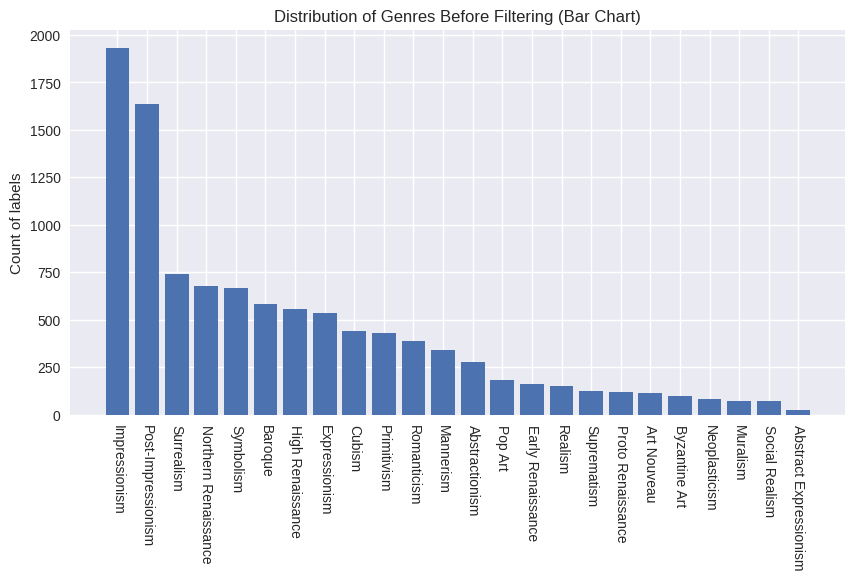

In [ ]:
# Plot the frequencies of the labels before filtering (Bar Chart)
plt.figure(figsize=(10, 5))
plt.bar(label_counts.index, label_counts.values)
plt.title('Distribution of Genres Before Filtering (Bar Chart)')
plt.ylabel('Count of labels')
plt.xticks(rotation=270, fontsize=10)
plt.show()

In [ ]:
threshold = 500

# Find labels with a frequency greater than or equal to the threshold
valid_labels = label_counts[label_counts >= threshold].index.tolist()

# Filter the data to include only these labels
df_filtered = df_exploded[df_exploded['genre'].isin(valid_labels)]

In [ ]:
print(df_filtered.head())

                                                                                      full_path  \
0    /content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_4.jpg   
1  /content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_119.jpg   
2  /content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_156.jpg   
3   /content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_34.jpg   
4   /content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_87.jpg   

              folder          genre               name        years  \
0  Amedeo_Modigliani  Expressionism  Amedeo Modigliani  1884 - 1920   
1  Amedeo_Modigliani  Expressionism  Amedeo Modigliani  1884 - 1920   
2  Amedeo_Modigliani  Expressionism  Amedeo Modigliani  1884 - 1920   
3  Amedeo_Modigliani  Expressionism  Amedeo Modigliani  1884 - 1920   
4  Amedeo_Modigliani  Expressionism  Amedeo Modigl

In [ ]:
df_filtered['nationality'].unique()

array(['Italian', 'Russian', 'French', 'Belgian', 'Spanish', 'Dutch',
       'Austrian', 'Flemish', 'Mexican', 'German', 'French,British',
       'Norwegian', 'German,Swiss'], dtype=object)

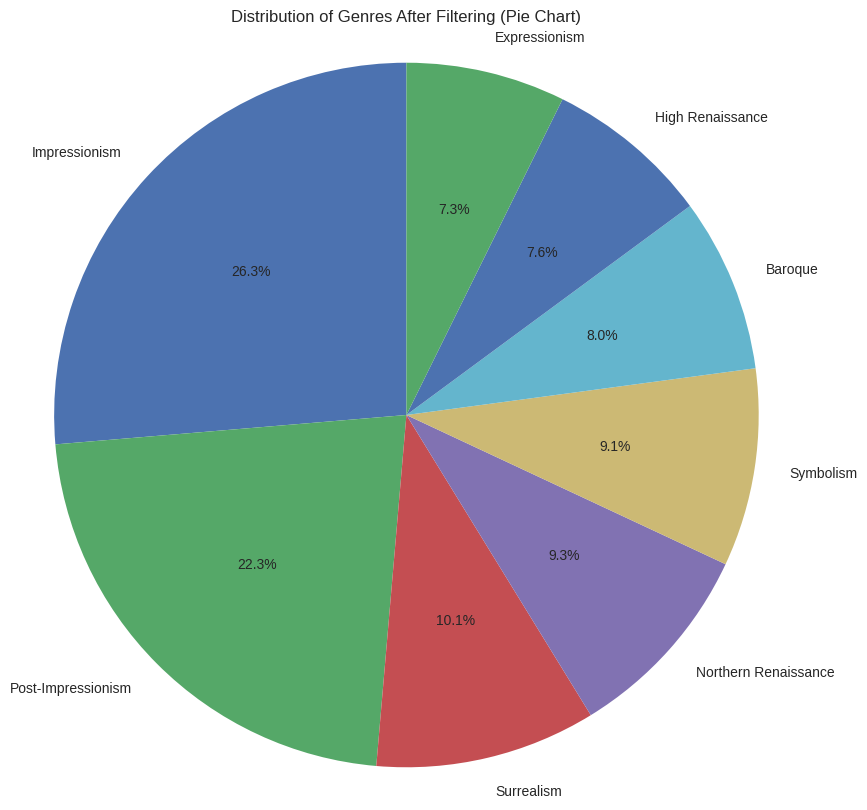

In [ ]:
# Recalculate the frequency of each genre after filtering
filtered_label_counts = df_filtered['genre'].value_counts()

# Plot the frequencies of the labels after filtering
plt.figure(figsize=(10, 10))
plt.pie(filtered_label_counts, labels=filtered_label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genres After Filtering (Pie Chart)')
plt.axis('equal')
plt.show()

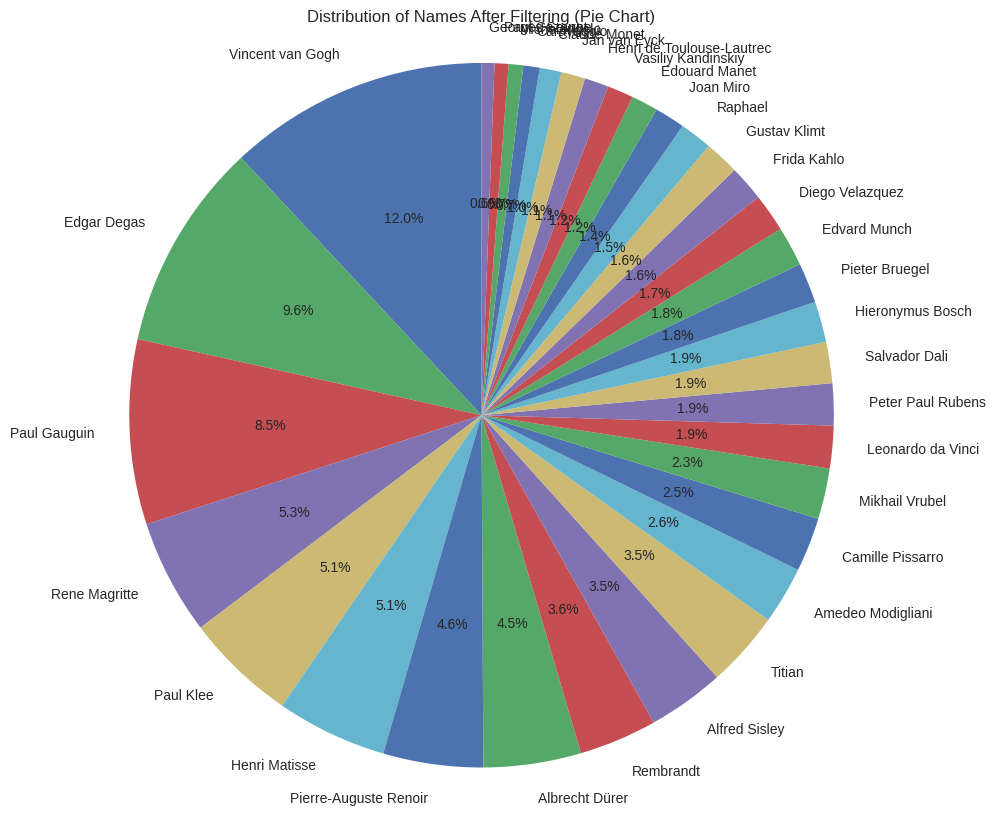

In [ ]:
filtered_label_counts = df_filtered['name'].value_counts()

# Plot the frequencies of the labels after filtering
plt.figure(figsize=(10, 10))
plt.pie(filtered_label_counts, labels=filtered_label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Names After Filtering (Pie Chart)')
plt.axis('equal')
plt.show()

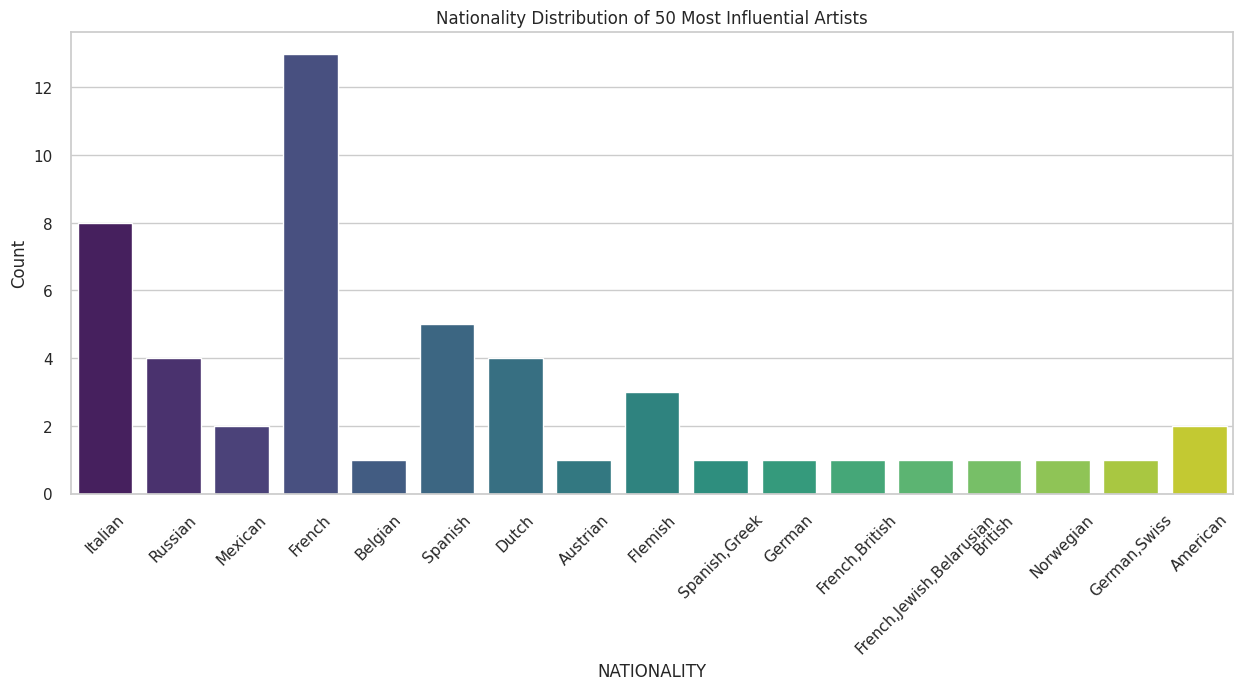

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.countplot(x='nationality',  data=artists_df, palette='viridis')
plt.title('Nationality Distribution of 50 Most Influential Artists')
plt.xlabel('NATIONALITY')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


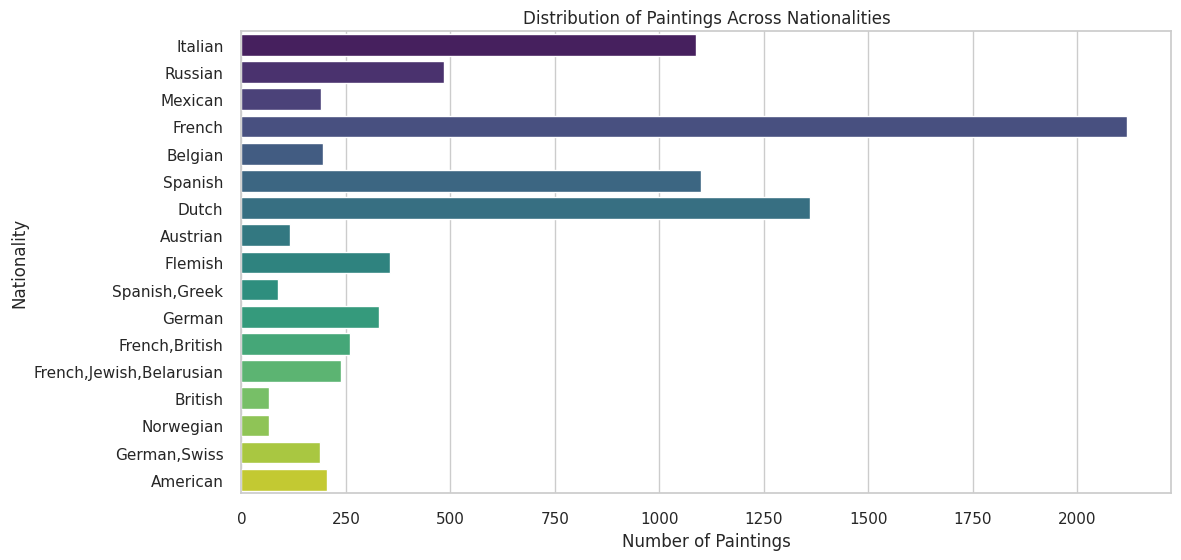

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the nationality column is 'nationality'
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create a countplot
sns.countplot(y='nationality', data=df, palette='viridis')

# Customize the plot
plt.title('Distribution of Paintings Across Nationalities')
plt.xlabel('Number of Paintings')
plt.ylabel('Nationality')

# Show the plot
plt.show()

<ipython-input-60-e32f10793477>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='name', y='genre', size='paintings', data=artists_df, sizes=(20, 200), palette='viridis')


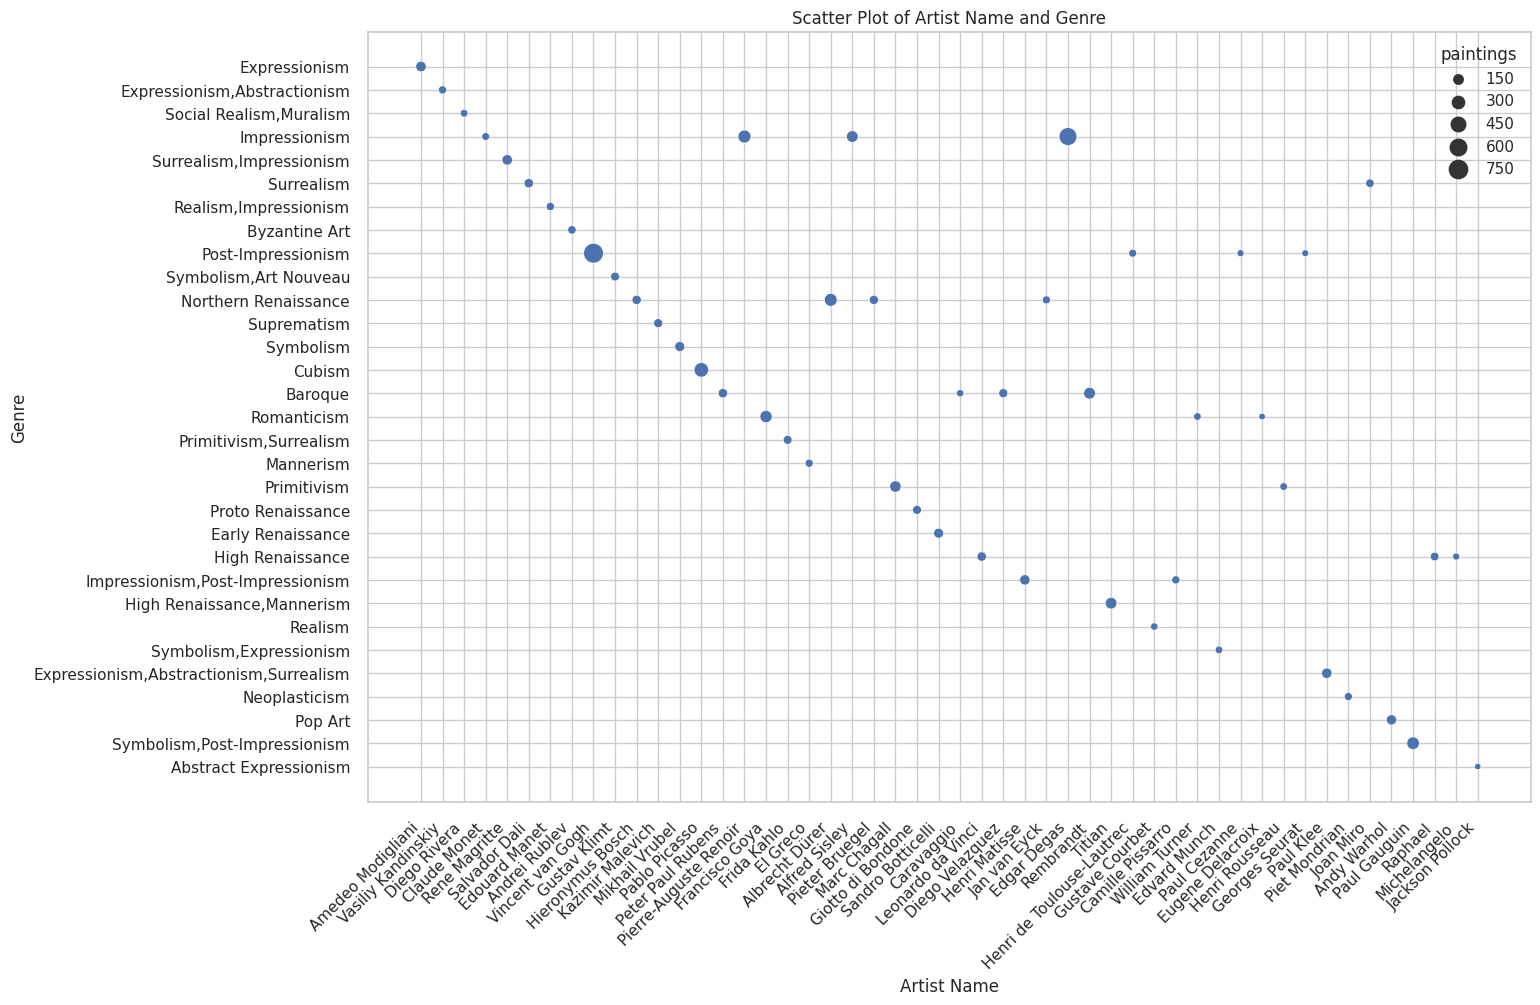

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and columns are 'name', 'genre', and 'paintings'
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Create a scatter plot
sns.scatterplot(x='name', y='genre', size='paintings', data=artists_df, sizes=(20, 200), palette='viridis')

# Customize the plot
plt.title('Scatter Plot of Artist Name and Genre')
plt.xlabel('Artist Name')
plt.ylabel('Genre')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [ ]:
# Save the filtered DataFrame as a CSV file
df_filtered.to_csv('/content/best-artworks-of-all-time/genre_filtered_artists.csv', index=False)

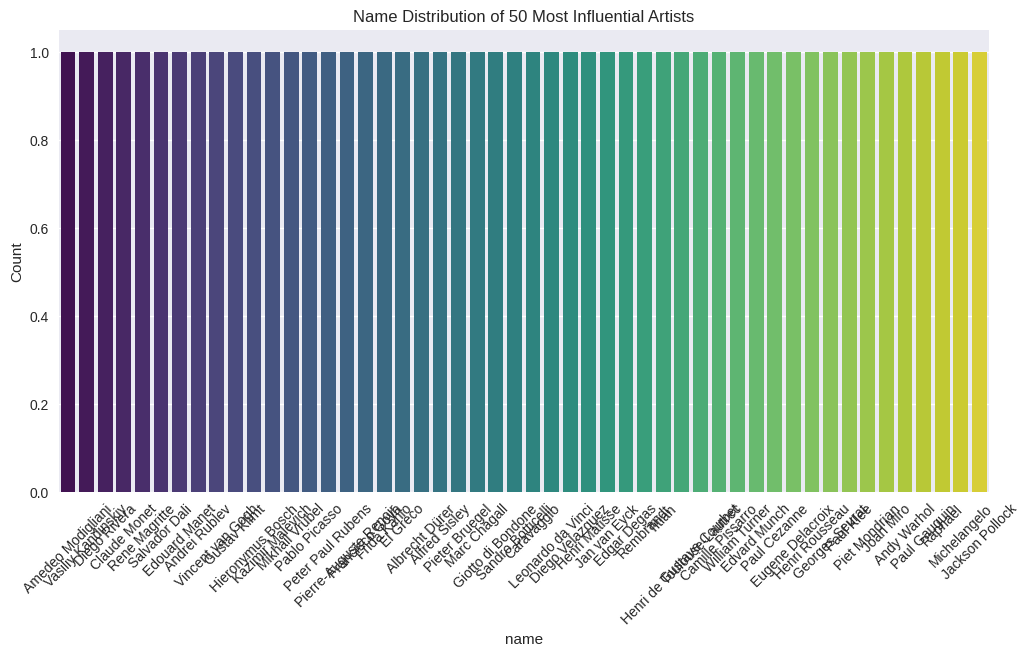

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='name', data=artists_df, palette='viridis')
plt.title('Name Distribution of 50 Most Influential Artists')
plt.xlabel('name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_filtered

,full_path,folder,genre,name,years,nationality
0,/content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_4.jpg,Amedeo_Modigliani,Expressionism,Amedeo Modigliani,1884 - 1920,Italian
1,/content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_119.jpg,Amedeo_Modigliani,Expressionism,Amedeo Modigliani,1884 - 1920,Italian
2,/content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_156.jpg,Amedeo_Modigliani,Expressionism,Amedeo Modigliani,1884 - 1920,Italian
3,/content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_34.jpg,Amedeo_Modigliani,Expressionism,Amedeo Modigliani,1884 - 1920,Italian
4,/content/best-artworks-of-all-time/images/images/Amedeo_Modigliani/Amedeo_Modigliani_87.jpg,Amedeo_Modigliani,Expressionism,Amedeo Modigliani,1884 - 1920,Italian
...,...,...,...,...,...,...
8417,/content/best-artworks-of-all-time/images/images/Michelangelo/Michelangelo_9.jpg,Michelangelo,High Renaissance,Michelangelo,1475 – 1564,Italian
8418,/content/best-artworks-of-all-time/images/images/Michelangelo/Michelangelo_31.jpg,Michelangelo,High Renaissance,Michelangelo,1475 – 1564,Italian
8419,/content/best-artworks-of-all-time/images/images/Michelangelo/Michelangelo_37.jpg,Michelangelo,High Renaissance,Michelangelo,1475 – 1564,Italian
8420,/content/best-artworks-of-all-time/images/images/Michelangelo/Michelangelo_8.jpg,Michelangelo,High Renaissance,Michelangelo,1475 – 1564,Italian
